# COMP 135 Fall 2019: HW1 STARTER

# Setup comp135_env package imports

In [98]:
import os
import numpy as np
import sklearn.neighbors
import sklearn.tree

from matplotlib import pyplot as plt
import seaborn as sns

In [99]:
%matplotlib inline

# Setup student-defined imports

In [100]:
from LeastSquaresLinearRegression import LeastSquaresLinearRegressor

In [101]:
from evaluate_perf_metrics import (
    calc_perf_metric__absolute_error, calc_perf_metric__squared_error,
    calc_perf_metrics_for_regressor_on_dataset)

# Load dataset

In [102]:
## TODO load all data (train/valid/test) into x_tr_NF, x_va_NF, x_te_NF, ...

In [103]:
y_tr_NF = np.loadtxt('data_abalone/y_train.csv', delimiter=',', skiprows=1)
y_va_NF = np.loadtxt('data_abalone/y_valid.csv', delimiter=',', skiprows=1)
y_te_NF = np.loadtxt('data_abalone/y_test.csv', delimiter=',', skiprows=1)

In [104]:
x_tr_NF = np.loadtxt('data_abalone/x_train.csv', delimiter=',', skiprows=1)
x_va_NF = np.loadtxt('data_abalone/x_valid.csv', delimiter=',', skiprows=1)
x_te_NF = np.loadtxt('data_abalone/x_test.csv', delimiter=',', skiprows=1)
#np.loadtxt('data_abalone/x_train.csv', delimiter=',', skiprows=1, usecols = 2)
diam_mm_tr = x_tr_NF[:,2].copy()
diam_mm_va = x_va_NF[:,2].copy()
diam_mm_te = x_te_NF[:,2].copy()
#np.loadtxt('data_abalone/x_train.csv', delimiter=',', skiprows=1, usecols = 5)
shucked_weight_g_tr = x_tr_NF[:,5].copy()
shucked_weight_g_va = x_va_NF[:,5].copy()
shucked_weight_g_te = x_te_NF[:,5].copy()
feature2_tr = x_tr_NF[:,[2,5]].copy()
feature2_va = x_va_NF[:,[2,5]].copy()
feature2_te = x_te_NF[:,[2,5]].copy()

# 1a : Abalone histograms of response variable 'rings'

#### 1a(i): Produce one figure with three subplots, showing histograms of $y$ from train/valid/test

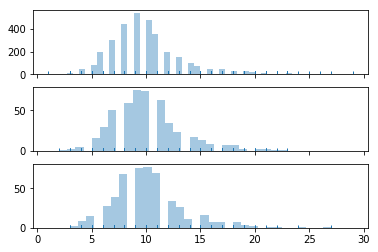

In [191]:
fig_h, axes_arr = plt.subplots(nrows=3, ncols=1, sharex=True)
sns.distplot(y_tr_NF, kde=False, rug=True, ax=axes_arr[0]);
sns.distplot(y_va_NF, kde=False, rug=True, ax=axes_arr[1]);
sns.distplot(y_te_NF, kde=False, rug=True, ax=axes_arr[2]);

## TODO plot histograms on the axes
## e.g. sns.distplot(y_tr_N, kde=False, rug=True, ax=axes_arr[0]);


#### 1a(ii): Describe the **train** distribution. Unimodal or multimodal? What shape? Are there noticeable outliers?

The train data is a bell-shaped unimodal distribution that is skewed right. There are some noticeable outliers to the far right of the graph. 

#### 1a(iii): Quantify train's descriptive statistics. 

In [106]:
### TODO CODE HERE
minimum = np.min(y_tr_NF)
maximum = np.max(y_tr_NF)
median = np.median(y_tr_NF)
mean = np.mean(y_tr_NF)
print("Minimum is: ", minimum)
print("Maximum is: ", maximum)
print("Median is: ", median)
print("Mean is: ", mean)

Minimum is:  1.0
Maximum is:  29.0
Median is:  9.0
Mean is:  9.902392947103275


# 1b : Scatterplots of 'rings' vs 'diam' and 'rings' vs 'shucked'

#### **1b(i):** Create figure with two subplots: scatter plot of `diam_mm` vs `rings` and scatter of `shucked_weight_g` vs `rings`.

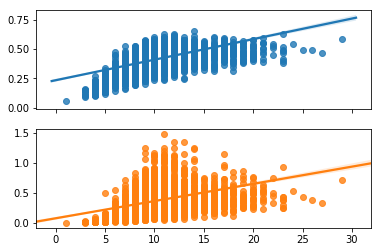

In [153]:
## TODO CODE HERE
fig_h, scatterp = plt.subplots(nrows=2, ncols=1, sharex=True)
diam_rings = sns.regplot(y_tr_NF,diam_mm_tr,ax=scatterp[0])
shucked_weight_rings = sns.regplot(y_tr_NF, shucked_weight_g_tr,ax=scatterp[1])

#### **1b(ii):** Describe the trends you between diameter and rings in a few sentences.

There seems to be a strong positive linear correlation between diameter and the number of rings. As the diameter increases, the number of rings tend to increase incrementally as well and we could predict the rings given the diameter

#### 1b(iii): Describe the trends you see between shucked weight and rings.


There seems to be a positive linear correlation between diameter and the number of rings however, it is not strong. There are many cases where a large shucked weight does not correspond to a shucked weight. It seems that the data is more normally distributed with regards to weight with the mean being around 10-15 rings. It does not seem as if we can predict the number of rings based on the shucked weights alone.

# Setup code for 1c

In [154]:
## Dummy class to perform "always guess training mean" prediction
class MeanPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.mean(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [155]:
## Dummy class to perform "always guess training median" prediction
class MedianPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.median(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [156]:
mean_value_predictor = MeanPredictor()
mean_value_predictor.fit(x_tr_NF,y_tr_NF)
## TODO fit the predictor, like mean_value_predictor.fit(x_tr_N2, y_tr_N)
predict_mean_tr = mean_value_predictor.predict(x_tr_NF)
predict_mean_va = mean_value_predictor.predict(x_va_NF)
predict_mean_te = mean_value_predictor.predict(x_te_NF)

## TODO evaluate predictions on train, valid, and test
yhat_tr = np.full((y_tr_NF.shape[0],1),predict_mean_tr)
yhat_va = np.full((y_va_NF.shape[0],1),predict_mean_va)
yhat_te = np.full((y_te_NF.shape[0],1),predict_mean_te)

mse_mean_tr = calc_perf_metric__squared_error(y_tr_NF, yhat_tr)
mse_mean_va = calc_perf_metric__squared_error(y_va_NF, yhat_va)
mse_mean_te = calc_perf_metric__squared_error(y_te_NF, yhat_te)

print(mse_mean_tr, mse_mean_va, mse_mean_te)

[10.2744779] [10.94938356] [10.5646027]


In [157]:
median_value_predictor = MedianPredictor()
median_value_predictor.fit(x_tr_NF,y_tr_NF)
## TODO fit the predictor
predict_median_tr = median_value_predictor.predict(x_tr_NF)
predict_median_va = median_value_predictor.predict(x_va_NF)
predict_median_te = median_value_predictor.predict(x_te_NF)

## TODO evaluate predictions on train, valid, and test
yhat_tr_med = np.full((y_tr_NF.shape[0],1),predict_median_tr)
yhat_va_med = np.full((y_va_NF.shape[0],1),predict_median_va)
yhat_te_med = np.full((y_te_NF.shape[0],1),predict_median_te)

mse_median_tr = calc_perf_metric__squared_error(y_tr_NF, yhat_tr_med)
mse_median_va = calc_perf_metric__squared_error(y_va_NF, yhat_va_med)
mse_median_te = calc_perf_metric__squared_error(y_te_NF, yhat_te_med)

print(mse_median_tr, mse_median_va, mse_median_te)

[11.08879093] [11.994] [11.602]


# 1c : Results Table for Abalone MSE

#### **1c:** Make a table of the **mean-squared-error** for each of the MeanPredictor and MedianPredictor predictors when evaluated on all 3 dataset splits (training, validation, and test).


**Mean Squared Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |    10.274   |     11.089       
| valid |    10.949   |     11.994
| test  |    10.565   |     11.602


# Model fitting code for 1d

In [158]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
linear_regressor_2feats.fit(feature2_tr, y_tr_NF)
#Training Data
yhat_2f_tr = linear_regressor_2feats.predict(feature2_tr)
mse_2feat_tr = calc_perf_metric__squared_error(y_tr_NF, yhat_2f_tr)
#Validation Data
yhat_2f_va = linear_regressor_2feats.predict(feature2_va)
mse_2feat_va = calc_perf_metric__squared_error(y_va_NF, yhat_2f_va)
#Test Data
yhat_2f_te = linear_regressor_2feats.predict(feature2_te)
mse_2feat_te = calc_perf_metric__squared_error(y_te_NF, yhat_2f_te)

print(mse_2feat_tr, mse_2feat_va, mse_2feat_te)
# TODO fit and evaluate

6.481749066861285 6.51749878831106 6.741106489635403


In [159]:
linear_regressor_8feats = LeastSquaresLinearRegressor()
linear_regressor_8feats.fit(x_tr_NF, y_tr_NF)
#Training Data
yhat_8f_tr = linear_regressor_8feats.predict(x_tr_NF)
mse_8feat_tr = calc_perf_metric__squared_error(y_tr_NF, yhat_8f_tr)
#Validation Data
yhat_8f_va = linear_regressor_8feats.predict(x_va_NF)
mse_8feat_va = calc_perf_metric__squared_error(y_va_NF, yhat_8f_va)
#Test Data
yhat_8f_te = linear_regressor_8feats.predict(x_te_NF)
mse_8feat_te = calc_perf_metric__squared_error(y_te_NF, yhat_8f_te)

print(mse_8feat_tr, mse_8feat_va, mse_8feat_te)
# TODO fit and evaluate

4.912543420787934 5.10982385799375 4.390538998945608


# 1d : Results Table for Mean Squared Error on Abalone

### **1d(i)** and **1d(ii)** Add results to the table

**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats)
| ----- | ----------- | ------------ | --------------------- | ---------------------
| train |   10.274    |   11.089     |        6.482          |        4.913
| valid |   10.949    |   11.994     |        6.517          |        5.110
| test  |   10.565    |   11.602     |        6.741          |        4.391

### **1d(iii):** Does using more features seem worthwhile? Do you think the improvement on the test data is significant? Why or why not?


Theoretically, using more features does provide a noticeable improvement over using only 2 features. However, it should be noted that increasing the degree of features used from 2 to 8 does not bring about as much a change as going from a constant-prediction method to using a 2-feature linear regression (6.717 to 5.110 vs 10.949 to 6.517 for the validation set). 

However, in practice, depending on the case, using 2 features might be enough. Possible scenarios is where data is scarce and we are not able to obtain a large data set if we need to measure all 8 features.

# 1e : Model selection for K-Nearest Neighbor Regressor

In [197]:
param_name = 'n_neighbors'
N = x_tr_NF.shape[0]
param_list = [1, 3, 5, 7, 11, 21, 41, 61, 81, 101, 201, 401, 801,N] # TODO ADD N
# Keep only values below total training size
param_list = [p for p in param_list if p <= param_list[-1]]

In [203]:
train_mse_list = []
valid_mse_list = []
test_mse_list = []
for n_neighbors in param_list:
    knn_regr = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=n_neighbors,
        metric='euclidean',
        algorithm='brute')
    knn_regr.fit(x_tr_NF, y_tr_NF)
    predict_knn_tr = knn_regr.predict(x_tr_NF)
    predict_knn_va = knn_regr.predict(x_va_NF)
    predict_knn_te = knn_regr.predict(x_te_NF)
    mse_knn_tr = calc_perf_metric__squared_error(y_tr_NF, predict_knn_tr)
    mse_knn_va = calc_perf_metric__squared_error(y_va_NF, predict_knn_va)
    mse_knn_te = calc_perf_metric__squared_error(y_te_NF, predict_knn_te)
    train_mse_list.append(mse_knn_tr)
    valid_mse_list.append(mse_knn_va)
    test_mse_list.append(mse_knn_te)
    
print(train_mse_list[5])
print(valid_mse_list[5])
print(test_mse_list[5])
    # TODO fit and predict and track performance metric values in the lists

4.384303049515402
4.80473922902494
4.542798185941045


#### **1e(i):** Make a line plot for mean-squared-error (MSE) vs $K$ on the validation set

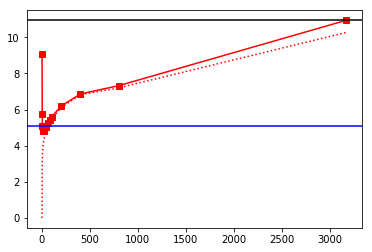

In [205]:
# TODO
fig_h, mse_K = plt.subplots(nrows=1, ncols=1, sharex=True)
mse_K.plot(param_list,valid_mse_list, 'rs-')
mse_K.plot(param_list,train_mse_list, 'r:')
mse_K.axhline(10.949, c = "black")
mse_K.axhline(5.110, c = "blue")
#mse_K.set_xlim(0,40)

#### **1e(ii):** Which value do you recommend?

In [166]:
#   I would recommend 7 neighbors.It seems that the improvement from K 
# value of 7 to K value of 10 or more is not substantial. We also run 
# the risk of having less data to work with.

#### **1e(iii):** Cumulative results table with K-Nearest Neighbor

**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats) | k-NN (8 feats)  |
| ----- | ----------- | ------------ | --------------------- | --------------------- | ----- |
| train |    10.274   |   11.089     |        6.482          |        4.913   |   4.384
| valid |    10.949   |   11.994     |        6.517          |        5.110   |   4.805
| test  |    10.565   |   11.602     |        6.741          |        4.391   |   4.543

# <a name="problem-1-g"> 1g: Analyzing Residuals </a>

Bonus points possible. Not a required question. Feel free to skip

In [167]:
# TODO compute the predicted y values for linear regr and kNN

#### **1f(i):** Plot scatters of y vs yhat for linear regression and the best k-NN regressor


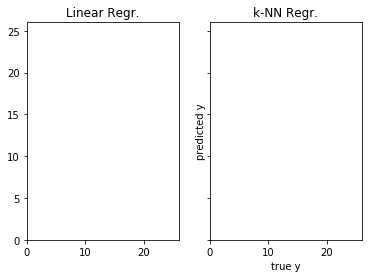

In [168]:
fig_h, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plt.xlim([0, 26]); plt.ylim([0, 26]);

# ax_grid[0].plot(y_va_N, linear_yhat_va_N, 'k.', alpha=0.2);
ax_grid[0].set_title('Linear Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');

# ax_grid[1].plot(y_va_N, knn_yhat_va_N, 'k.', alpha=0.2);
plt.title('k-NN Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');

#### **1f(ii):** What kinds of systematic errors does each method make? What should be done about these?


TODO ANSWER HERE

# Problem 2 : Analysis of Doctor Visits

In [207]:
# TODO load data here
y_tr_DV = np.loadtxt('data_doctorvisits/y_train.csv', delimiter=',', skiprows=1)
y_va_DV = np.loadtxt('data_doctorvisits/y_valid.csv', delimiter=',', skiprows=1)
y_te_DV = np.loadtxt('data_doctorvisits/y_test.csv', delimiter=',', skiprows=1)
x_tr_DV = np.loadtxt('data_doctorvisits/x_train.csv', delimiter=',', skiprows=1)
x_va_DV = np.loadtxt('data_doctorvisits/x_valid.csv', delimiter=',', skiprows=1)
x_te_DV = np.loadtxt('data_doctorvisits/x_test.csv', delimiter=',', skiprows=1)
feature2_tr_DV = x_tr_DV[:,[0,3]].copy()
feature2_va_DV = x_va_DV[:,[0,3]].copy()
feature2_te_DV = x_te_DV[:,[0,3]].copy()

# 2a : Baseline predictions

#### **2a(i):** Given stakeholder's preferences, which error metric is most appropriate and why?

Because errors should scale linearly, we should use the *mean absolute error* metric.

If we used mean squared error, an error of 2 would cost 4x an error of 1.

In [208]:
mean_value_predictor = MeanPredictor()
mean_value_predictor.fit(x_tr_DV,y_tr_DV)
#TODO fit and predict...
predict_mean_DV_tr = mean_value_predictor.predict(x_tr_DV)
predict_mean_DV_va = mean_value_predictor.predict(x_va_DV)
predict_mean_DV_te = mean_value_predictor.predict(x_te_DV)
## TODO evaluate predictions on train, valid, and test
yhat_DV_tr = np.full((y_tr_DV.shape[0],1),predict_mean_DV_tr)
yhat_DV_va = np.full((y_va_DV.shape[0],1),predict_mean_DV_va)
yhat_DV_te = np.full((y_te_DV.shape[0],1),predict_mean_DV_te)

mae_mean_tr = calc_perf_metric__absolute_error(y_tr_DV, yhat_DV_tr)
mae_mean_va = calc_perf_metric__absolute_error(y_va_DV, yhat_DV_va)
mae_mean_te = calc_perf_metric__absolute_error(y_te_DV, yhat_DV_te)

print(mae_mean_tr, mae_mean_va, mae_mean_te)

[4.49431369] [4.70287493] [4.42290781]


In [209]:
median_value_predictor = MedianPredictor()
median_value_predictor.fit(x_tr_DV,y_tr_DV)
#TODO fit and predict...
predict_median_DV_tr = median_value_predictor.predict(x_tr_DV)
predict_median_DV_va = median_value_predictor.predict(x_va_DV)
predict_median_DV_te = median_value_predictor.predict(x_te_DV)
## TODO evaluate predictions on train, valid, and test
yhat_DV_tr_med = np.full((y_tr_DV.shape[0],1),predict_median_DV_tr)
yhat_DV_va_med = np.full((y_va_DV.shape[0],1),predict_median_DV_va)
yhat_DV_te_med = np.full((y_te_DV.shape[0],1),predict_median_DV_te)

mae_median_tr = calc_perf_metric__absolute_error(y_tr_DV, yhat_DV_tr_med)
mae_median_va = calc_perf_metric__absolute_error(y_va_DV, yhat_DV_va_med)
mae_median_te = calc_perf_metric__absolute_error(y_te_DV, yhat_DV_te_med)

print(mae_median_tr, mae_median_va, mae_median_te)

## TODO fit and predict...

[4.22930123] [4.478] [4.152]


#### 2a(ii) : Results Table for Doctor Visits with Mean Absolute Error

**Mean Absolute Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |    4.494    |    4.229   
| valid |    4.703    |    4.478
| test  |    4.423    |    4.152

# Setup code for 2b

In [210]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
# TODO fit and predict
#TO FIX
linear_regressor_2feats.fit(feature2_tr_DV, y_tr_DV)
#Training Data
yhatDV_2f_tr = linear_regressor_2feats.predict(feature2_tr_DV)###
mae_2feat_tr = calc_perf_metric__absolute_error(y_tr_DV, yhatDV_2f_tr)

#Validation Data
yhatDV_2f_va = linear_regressor_2feats.predict(feature2_va_DV)###
mae_2feat_va = calc_perf_metric__absolute_error(y_va_DV, yhatDV_2f_va)
#Test Data
yhatDV_2f_te = linear_regressor_2feats.predict(feature2_te_DV)###
mae_2feat_te = calc_perf_metric__absolute_error(y_te_DV, yhatDV_2f_te)

print(mae_2feat_tr, mae_2feat_va, mae_2feat_te)

4.215931187771396 4.413213091110743 4.16474311522888


In [211]:
linear_regressor_10feats = LeastSquaresLinearRegressor()
# TODO fit and predict
#TO FIX
linear_regressor_10feats.fit(x_tr_DV, y_tr_DV)
#Training Data
yhatDV_10f_tr = linear_regressor_10feats.predict(x_tr_DV)###
mae_10feat_tr = calc_perf_metric__absolute_error(y_tr_DV, yhatDV_10f_tr)

#Validation Data
yhatDV_10f_va = linear_regressor_10feats.predict(x_va_DV)###
mae_10feat_va = calc_perf_metric__absolute_error(y_va_DV, yhatDV_10f_va)
#Test Data
yhatDV_10f_te = linear_regressor_10feats.predict(x_te_DV)###
mae_10feat_te = calc_perf_metric__absolute_error(y_te_DV, yhatDV_10f_te)

print(mae_10feat_tr, mae_10feat_va, mae_10feat_te)

4.127693735349912 4.304945422108992 4.1006455022296215


** 2b(i) and 2b(ii):** Add LR to Results Table for MAE on DoctorVisits

**Mean Absolute Error:**

| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) |
| ----- | ----------- | ------------ | --------------------- | ---------------------- |
| train |    4.494    |    4.229   |     4.216      |    4.128
| valid |    4.703    |    4.478   |     4.413      |    4.305
| test  |    4.423    |    4.152   |     4.165      |    4.101

** 2b(iii):** Does using more features seem worthwhile? Why or why not?

In [212]:
# Using more features might be worthwhile in this case. Using
# a 2-feature linear regression does not provide much improvement in terms
# of error when compared to the guess-median method (even more for the 
# test set). With the 10-feature regression however, we see noticeable 
# improvement. Hence, it might be worthwhile in this case to utilize
# the extra features.

# 2c : DecisionTreeRegressor 

In [213]:
param_name = 'min_samples_leaf'
N = x_tr_DV.shape[0]
param_list = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, N] # TODO add size of training set

In [214]:
train_mae_list = []
valid_mae_list = []
test_mae_list = []
for param in param_list:
    tree_regr = sklearn.tree.DecisionTreeRegressor(
        min_samples_leaf=param,
        random_state=42)
    tree_regr.fit(x_tr_DV, y_tr_DV)
    predict_dt_tr = tree_regr.predict(x_tr_DV)
    predict_dt_va = tree_regr.predict(x_va_DV)
    predict_dt_te = tree_regr.predict(x_te_DV)
    mae_dt_tr = calc_perf_metric__absolute_error(y_tr_DV, predict_dt_tr)
    mae_dt_va = calc_perf_metric__absolute_error(y_va_DV, predict_dt_va)
    mae_dt_te = calc_perf_metric__absolute_error(y_te_DV, predict_dt_te)
    train_mae_list.append(mae_dt_tr)
    valid_mae_list.append(mae_dt_va)
    test_mae_list.append(mae_dt_te)
    
print(train_mae_list[7])
print(valid_mae_list[7])
print(test_mae_list[7])
    
    # Fit, predict, and track performance metrics...

4.080285135255221
4.400558000955456
4.268461965135204


#### 2c(i): Line plot of mean absolute error vs min_samples_leaf

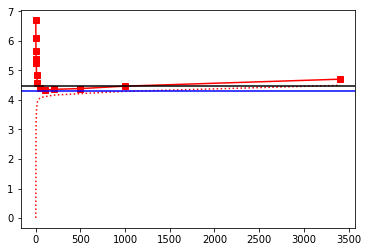

In [215]:
# TODO plot results
fig_h, mae_DT = plt.subplots(nrows=1, ncols=1, sharex=True)
mae_DT.plot(param_list,valid_mae_list,'rs-')
mae_DT.plot(param_list,train_mae_list,'r:')
mae_DT.axhline(4.305, c = "blue")
mae_DT.axhline(4.478, c = "black")
#mae_DT.set_xlim(0,200)

#### **2c(ii):** Which value of min_samples_leaf would you recommend?


I would recommend using min_samples_leaf = 100. This allows us to reach the performance of a 10-feature regression using the decision-tree method 

#### 2c(iii): Add a column to the results table for MAE on DoctorVisits

**Mean Absolute Error:**


| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) | decision tree
| ----- | ----------- | ------------ | --------------------- | ---------------------- | --- |
| train |    4.494    |    4.229   |     4.216      |    4.128  | 4.087
| valid |    4.703    |    4.478   |     4.413      |    4.305  | 4.397
| test  |    4.423    |    4.152   |     4.165      |    4.101  | 4.322

# 2d : DecisionTreeRegressor with MAE Training Criterion

In [216]:
train_mae_list = []
valid_mae_list = []
test_mae_list = []
for param in param_list:
    tree_regr = sklearn.tree.DecisionTreeRegressor(
        criterion='mae', # USE MEAN ABSOLUTE ERROR here
        min_samples_leaf=param,
        random_state=42)
    tree_regr.fit(x_tr_DV, y_tr_DV)
    predict_dt_tr = tree_regr.predict(x_tr_DV)
    predict_dt_va = tree_regr.predict(x_va_DV)
    predict_dt_te = tree_regr.predict(x_te_DV)
    mae_dt_tr = calc_perf_metric__absolute_error(y_tr_DV, predict_dt_tr)
    mae_dt_va = calc_perf_metric__absolute_error(y_va_DV, predict_dt_va)
    mae_dt_te = calc_perf_metric__absolute_error(y_te_DV, predict_dt_te)
    train_mae_list.append(mae_dt_tr)
    valid_mae_list.append(mae_dt_va)
    test_mae_list.append(mae_dt_te)
    
print(train_mae_list[8])
print(valid_mae_list[8])
print(test_mae_list[8])
    # TODO fit, predict, and track performance metrics

3.884321785085144
4.198
4.008


#### 2d(i): Line plot of mean absolute error vs min_samples_leaf

(0, 500)

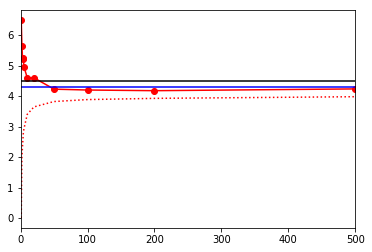

In [217]:
# TODO
fig_h, mae_DT_MAE = plt.subplots(nrows=1, ncols=1, sharex=True)
mae_DT_MAE.plot(param_list,valid_mae_list, marker = 'o', color = 'r')
mae_DT_MAE.plot(param_list,train_mae_list,'r:')
mae_DT_MAE.axhline(4.305, c = "blue")
mae_DT_MAE.axhline(4.478, c = "black")
mae_DT_MAE.set_xlim(0,500)

#### 2d(ii): Which value would you recommend?

In [188]:
#  I would recommend either 100 or 200 min samples. This allows us to 
# beat the performance of 10-feature regression as well as obtain the best
# performance for the decision tree method.

#### Setup for 2d(iii)

#### 2d(iii): Add a column to the results table for MAE on DoctorVisits


**Mean Absolute Error:**


| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) | decision tree (MSE) | decision tree (MAE)
| ----- | ----------- | ------------ | --------------------- | ---------------------- | --- | --- |
| train |    4.494    |    4.229   |     4.216      |    4.128  | 4.087 | 3.884
| valid |    4.703    |    4.478   |     4.413      |    4.305  | 4.397 | 4.198
| test  |    4.423    |    4.152   |     4.165      |    4.101  | 4.322 | 4.008

In [135]:
#2diV) What makes this better than the previous? 

#   In this case, use of "MAE" criterion minimizes L1 Loss function whereas 
# default "MSE" criterion minimizes L2 Loss function. In our validation 
# sample, it appears that there are a lot of outliers. In such a case, 
# the MSE is greatly affected as any outlier error difference is squared, 
# whereas use of MAE is not affected as much by such outliers. 

# Problem 3: Concept questions

# 3a: Limits of $K$-NN

**Question**: When $K$ equals the total training set size $N$, the $K$-nearest-neighbor regression algorithm approaches the behavior of which other regression method discussed here?

#### 3a Answer:

Based off of data, the K-nearest-neighbor regression approaches the behavior of Mean-Guessing regression. This is because when predictions for each feature take into consideration the entire training set, assuming that it uses the same weights for all, it essentially performs a mean-calculation for this feature. 

# 3b: Modifications of $K$-NN

**Question**: Suppose in problem 2, when trying to minimize *mean absolute error* on heldout data, that instead of a DecisionTreeRegressor, we had used a $K$-NN regressor with Euclidean distance (as in Problem 1f).  

Would we expect $K$-NN with large $K$ to always beat the strongest constant-prediction baseline (e.g. guess-median or guess-mean)?

To get better MAE values using a nearest-neighbor like approach, should we change the distance function used to compute neighbors? Would we need to change some other step of the $K$-NN prediction process?


#### 3b Answer:

No, K-NN would not always beat the strongest constant-prediction baseline. K-NN using Euclidean distance will tend to approach mean. In problem 2, we see that the strongest constant-prediction is the median-guessing method, which has a lower MAE than the mean-guessing method. If we were to use a K that is close to N, then it is possible that the median-guessing method might perform better. 

To get better MAE values, we can change the distance function use to the Manhanttan distance function. We will need to modify the prediction function of the k_NN process as well.


# 3c: Linear Regression with Categorical Features

**Question:** Your colleague trains a linear regression model on a subset of the DoctorVisits data using only the `has_medicaid` and `has_private_insurance` features. Thus, all features in the vector have a binary categorical type and can be represented via a redundant one-hot encoding. 

To your dismay, you discover that your colleague failed to include a bias term (aka intercept term) when training the weights. You recall from class that including a bias term can be important.

To be concrete, you wish each example $x_i$ was represented as a (bias-included) vector:
$$
x_i = [
    \texttt{has_medicaid}
    \quad \texttt{has_private_insurance}
    \quad 1
] \quad \quad \quad ~
$$

However, your colleague used the following representation:
$$
\tilde{x}_i = [
    \texttt{has_medicaid}
    \quad \texttt{not(has_medicaid)}
    \quad \texttt{has_private_insurance}
    \quad \texttt{not(has_private_insurance)} 
]
$$

Your colleague has delivered to you a length-4 feature vector $\tilde{w}$ for the 4 features above, but then left for vacation without giving you access to the training data.

Can you manipulate the $\tilde{w}$ vector to estimate an appropriate $w$ and $b$ such that for all possible inputs $x_i$:

$$
    w^T x_i + b = \tilde{w}^T \tilde{x}_i
$$

#### 3c Answer:


We have: 
$$
\tilde w = [\tilde w_{1} \quad \tilde w_{2} \quad \tilde w_{3} \quad \tilde w_{4}] and \tilde{x}_i = [\tilde x_{1} \quad \tilde x_{2} \quad \tilde x_{3} \quad \tilde x_{4}]
$$

$$
\tilde{w}^T \tilde{x}_i = \tilde w_{1} \tilde x_{1} + \tilde w_{2}\tilde x_{2} + \tilde w_{3}\tilde x_{3} + \tilde w_{4}\tilde x_{4}
$$

We know that $\tilde x_{1} = x_{1}, \tilde x_{2} = 1 - x_{1}$ and $\tilde x_{3} = x_{2}, \tilde x_{4} = 1 - x_{2}$ as each element in a pair complements the other (If there is medicaid, $\tilde x_{1} = 1$ and $\tilde x_{2} = 0$ and vice versa..)

Using algebraic manipulations we have: 

$$
\tilde{w}^T \tilde{x}_i = \tilde w_{1}x_{1} + \tilde w_{2}(1- x_{1}) + \tilde w_{3} x_{2} + \tilde w_{4}(1 - x_{2})
$$

$$
= (\tilde w_{1} - \tilde w_{2})x_{1} + (\tilde w_{3} - \tilde w_{4})x_{2} + (\tilde w_{2} + \tilde w_{4})
$$

Hence, we have: 
$$
W = [(\tilde w_{1} - \tilde w_{2}) \quad  (\tilde w_{3} - \tilde w_{4})]
$$

and 
$$
b = (\tilde w_{2} + \tilde w_{4})
$$